In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred
from credentials import FRED_API_KEY
from statsmodels.graphics.tsaplots import plot_acf
# set plot style to ggplot2
plt.style.use('ggplot')
# maximize the size of the labels, ticks, and figures
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
# legend settings
plt.rcParams['legend.fontsize'] = 10

In [19]:
# get data from FRED
fred = Fred(api_key = FRED_API_KEY)
series = fred.search('RSXFSN')
series

,frequency,frequency_short,id,last_updated,notes,observation_end,observation_start,popularity,realtime_end,realtime_start,seasonal_adjustment,seasonal_adjustment_short,title,units,units_short
series id,,,,,,,,,,,,,,,
RSXFSN,Monthly,M,RSXFSN,2023-05-16 07:34:06-05:00,E-commerce sales are included in the total mon...,2023-04-01,1992-01-01,39,2023-06-02,2023-06-02,Not Seasonally Adjusted,NSA,Advance Retail Sales: Retail Trade,Millions of Dollars,Mil. of $


In [20]:
# get data from FRED
retail_sales = fred.get_series('RSXFSN')
# Convert the data to a Pandas DataFrame
df = pd.DataFrame(retail_sales, columns=['sales_amount'])
# set the frequency of the time series to monthly
df.index.freq = 'MS'
df.isnull().sum()

sales_amount    0
dtype: int64

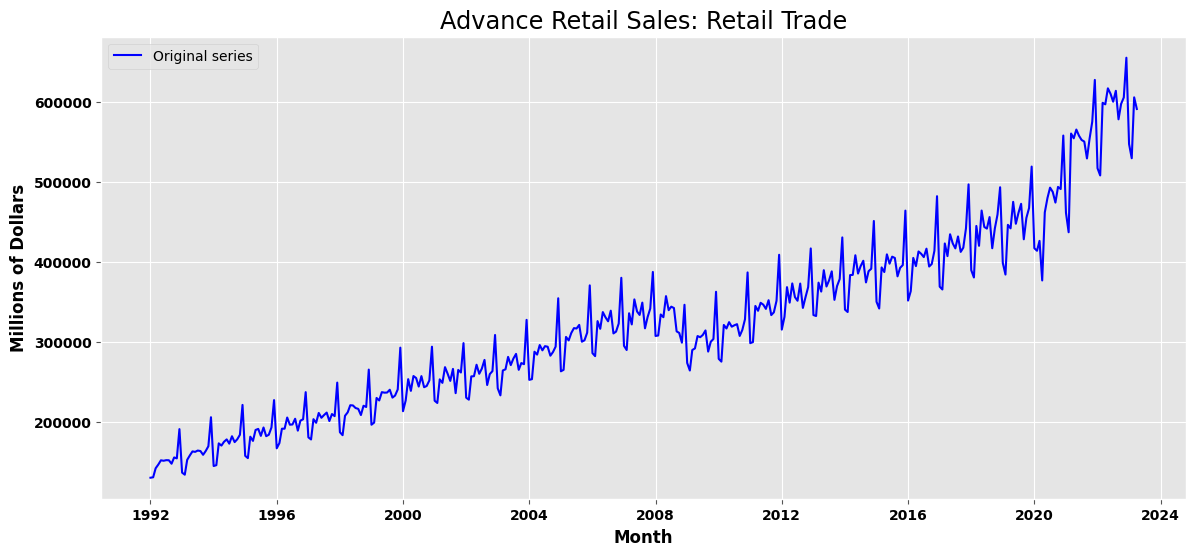

In [21]:
# plot the train and test sets 
plt.plot(df.index, df, label='Original series', color='blue')
plt.legend()
# set label properties
plt.title("Advance Retail Sales: Retail Trade")
plt.setp(plt.gca().get_xticklabels(), color='black', weight='bold')
plt.setp(plt.gca().get_yticklabels(), color='black', weight='bold')
plt.xlabel('Month', color='black', weight='bold')
plt.ylabel('Millions of Dollars', color='black', weight='bold')

# show the plot
plt.show()

# Adjust for inflation

In [22]:
# Obtain consumer price index data from FRED
cpi = fred.get_series('CPIAUCSL', observation_start='1992-01-01')
# Convert the retail sales to real terms
base_value = cpi[-1]
adj_retail_sales = df['sales_amount'] * (base_value / cpi)
# convert the retail sales to billions of dollars
adj_retail_sales = adj_retail_sales / 1000
# Convert the data to a Pandas DataFrame
adj_retail_sales = pd.DataFrame(adj_retail_sales, columns=['sales_amount'])

In [23]:
# split train and test
train = adj_retail_sales['1992-01-01':'2021-04-01'] 
test = adj_retail_sales['2021-05-01':'2023--04-01'] 
print(train.shape)
print(test.shape)

(352, 1)
(24, 1)


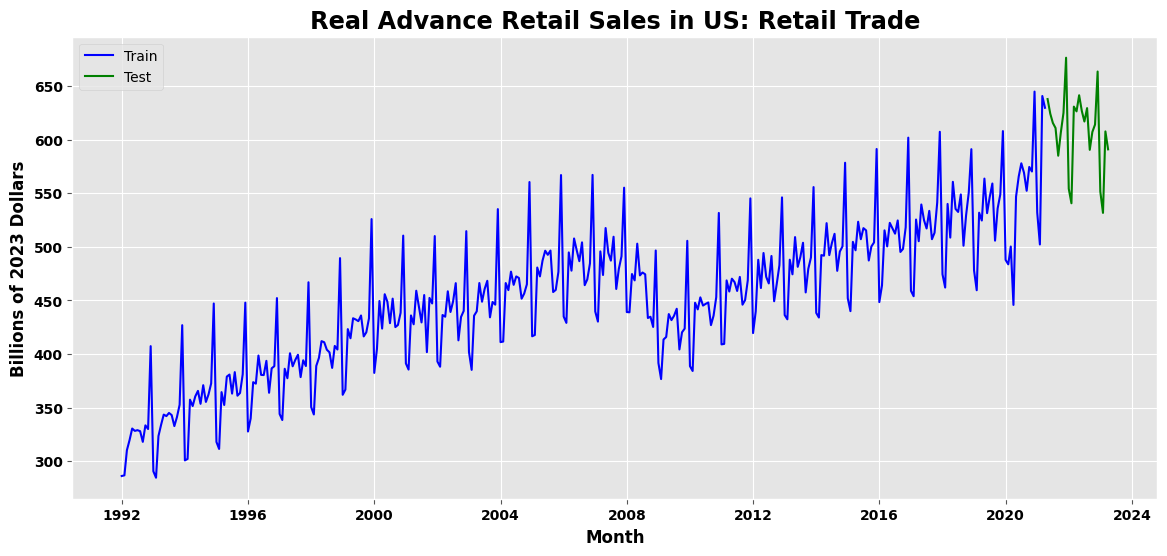

In [24]:
# plot the train and test sets 
plt.plot(train.index, train, label='Train', color='blue')
plt.plot(test.index, test, label='Test', color='green')
plt.legend()
# set label properties
plt.title("Real Advance Retail Sales in US: Retail Trade", color='black', weight='bold')
plt.setp(plt.gca().get_xticklabels(), color='black', weight='bold')
plt.setp(plt.gca().get_yticklabels(), color='black', weight='bold')
plt.xlabel('Month', color='black', weight='bold')
plt.ylabel('Billions of 2023 Dollars', color='black', weight='bold')

# show the plot
plt.show()

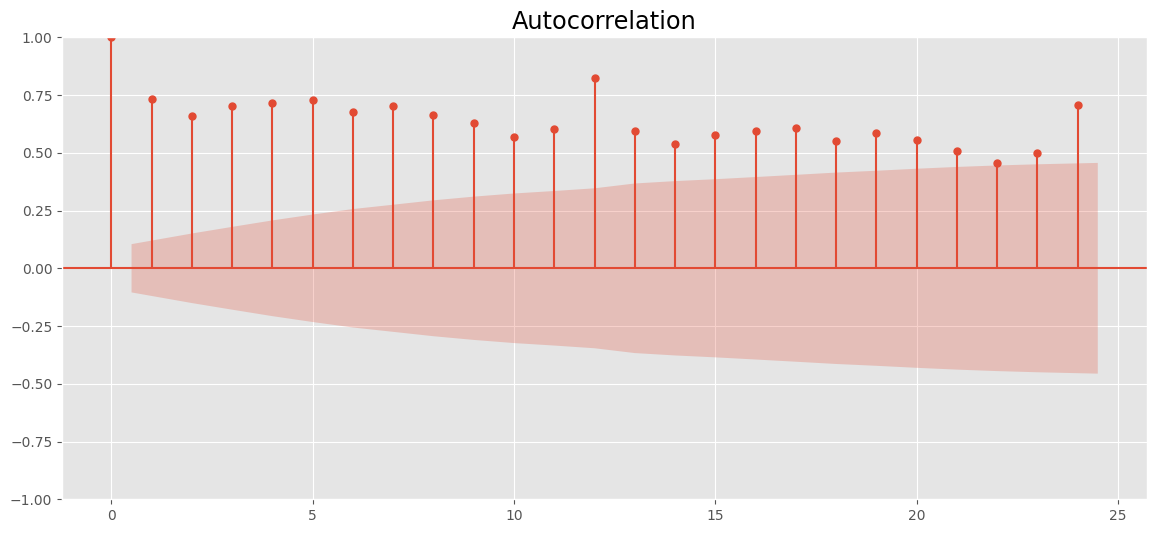

In [25]:
# Examine the trend and seasonality in the data
plot_acf(train, lags=24)
plt.show()

The time series exhibits an additive trend and seasonality. The trend component shows a linear increase in magnitude over time, while the seasonal effect maintains a constant level of variability.

In [26]:
# save the train and test sets to csv files
train.to_csv('train.csv')
test.to_csv('test.csv')